In [4]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import cPickle as pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [5]:
import pandas as pd
pd.set_option('display.max_rows', 29)
pd.set_option('display.max_columns', 29)

In [2]:
"""
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("MNIST_data/train", images=images, labels=labels)
"""
1

1

In [6]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [7]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1060 6GB (CNMeM is disabled, cuDNN 5110)


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
data = {'images': X_train, 'labels': y_train}

In [9]:
# data = np.load("MNIST_data/train.npz")
images=data['images']
labels=data['labels']
n=len(images)
images.shape

(60000, 28, 28)

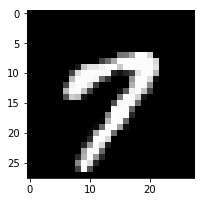

In [15]:
plot(images[15])

In [16]:
labels[15]

7

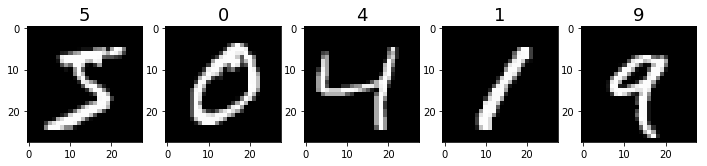

In [17]:
plots(images[:5], titles=labels[:5])

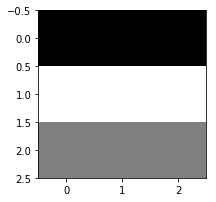

In [18]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [19]:
r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

A Jupyter Widget

In [22]:
k=w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
images[15][dims]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

In [95]:
np.all(images[15][dims] == images[15])

True

In [59]:
pd.DataFrame(images[15])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,121,162,253,253,213,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,63,107,170,251,252,252,252,252,250,214,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,25,192,226,226,241,252,253,202,252,252,252,252,252,225,0,0,0,0,0,0


In [23]:
corrtop = correlate(images[15], top)

In [25]:
corrtop.shape

(28, 28)

In [26]:
corrtop[dims]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

In [27]:
pd.DataFrame(corrtop)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,236,142,24,156,207,210,213,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,63,170,84,157,181,101,220,88,35,250,251,214,0,0,0,0,0
9,0,0,0,0,0,0,0,25,217,187,132,118,37,150,179,34,207,0,0,2,13,13,11,0,0,0,0,0


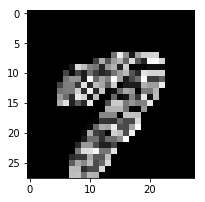

In [28]:
plot(corrtop[dims])

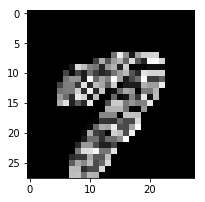

In [29]:
plot(corrtop)

In [30]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

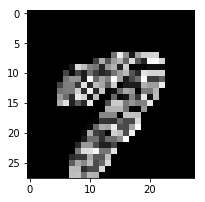

In [31]:
convtop = convolve(images[15], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

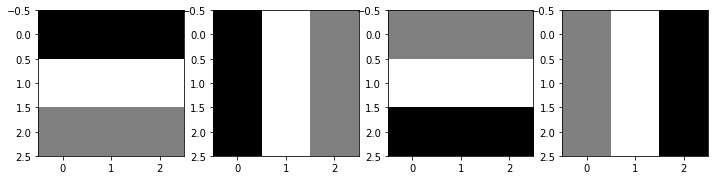

In [32]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

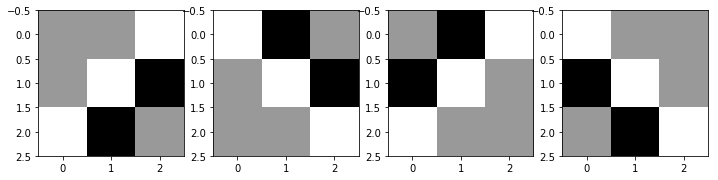

In [33]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

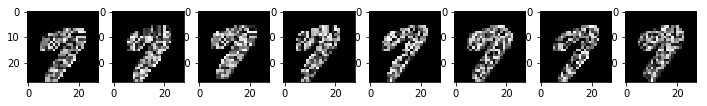

In [34]:
rots = straights + diags
corrs = [correlate(images[15], rot) for rot in rots]
plots(corrs)

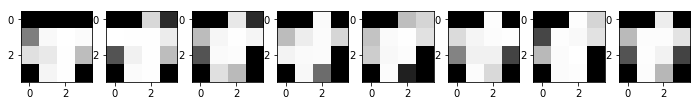

In [35]:
def pool(im): return block_reduce(im, (7,7), np.max)

plots([pool(im) for im in corrs])

In [36]:
eights=[images[i] for i in xrange(n) if labels[i]==8]
ones=[images[i] for i in xrange(n) if labels[i]==1]

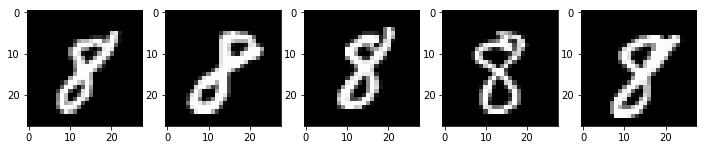

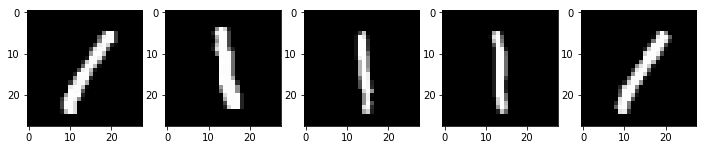

In [37]:
plots(eights[:5])
plots(ones[:5])

In [49]:
rots

[array([[-1, -1, -1],
        [ 1,  1,  1],
        [ 0,  0,  0]]), array([[-1,  1,  0],
        [-1,  1,  0],
        [-1,  1,  0]]), array([[ 0,  0,  0],
        [ 1,  1,  1],
        [-1, -1, -1]]), array([[ 0,  1, -1],
        [ 0,  1, -1],
        [ 0,  1, -1]]), array([[ 0. ,  0. ,  1. ],
        [ 0. ,  1. , -1.5],
        [ 1. , -1.5,  0. ]]), array([[ 1. , -1.5,  0. ],
        [ 0. ,  1. , -1.5],
        [ 0. ,  0. ,  1. ]]), array([[ 0. , -1.5,  1. ],
        [-1.5,  1. ,  0. ],
        [ 1. ,  0. ,  0. ]]), array([[ 1. ,  0. ,  0. ],
        [-1.5,  1. ,  0. ],
        [ 0. , -1.5,  1. ]])]

In [38]:
pool8 = [np.array([pool(correlate(im, rot)) for im in eights]) for rot in rots]

In [39]:
len(pool8), pool8[0].shape

(8, (5851, 4, 4))

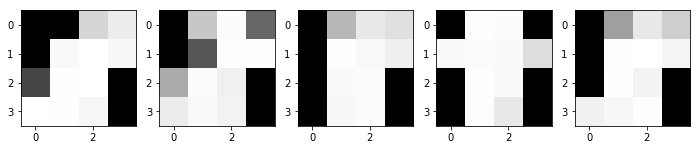

In [40]:
plots(pool8[0][0:5])

In [41]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [42]:
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

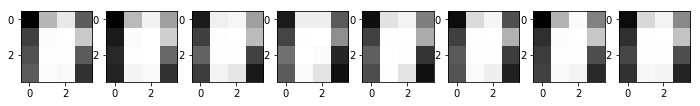

In [76]:
plots(filts8)

In [74]:
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

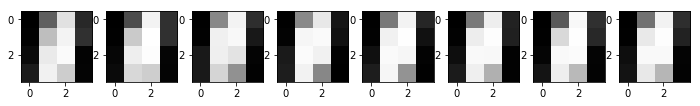

In [75]:
plots(filts1)

In [77]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

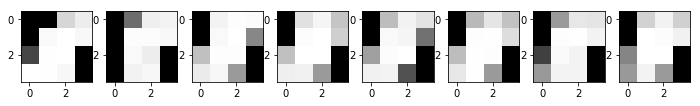

In [78]:
plots(pool_corr(eights[0]))

In [79]:
def sse(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if sse(pool_corr(im),filts1) > sse(pool_corr(im),filts8) else 0

In [80]:
sse(pool_corr(eights[0]), filts8), sse(pool_corr(eights[0]), filts1)

(4748410.3833, 4750488.8175)

In [88]:
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

[4798, 316]

In [89]:
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

[1053, 6426]

In [96]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [97]:
np.array([is8_n1(im) for im in eights]).sum()

45

In [99]:
np.array([is8_n1(im) for im in ones]).sum()

32

In [91]:
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

[45, 32]

In [100]:
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]

[5806, 6710]